In [3]:
import matplotlib.pyplot as plt
import pandas
import numpy as np

In [15]:
Hg_sp2 = np.asarray(pandas.read_csv('Hg2nd.csv',skipinitialspace=True))

In [19]:
Hg_sp2 = np.asarray(Hg_sp2)

[[2.20000000e-04 9.99993960e-01]
 [3.20000000e-04 9.99993960e-01]
 [4.20000000e-04 9.99993960e-01]
 ...
 [1.70659968e+02 9.74900000e-05]
 [1.70660068e+02 9.75200000e-05]
 [1.70660168e+02 9.75400000e-05]]


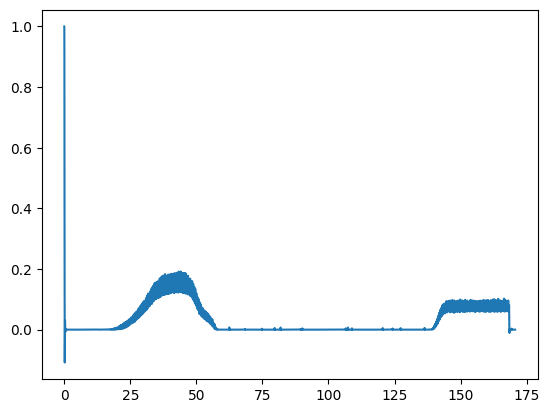

In [20]:
plt.plot(Hg_sp2[:,0],Hg_sp2[:,1])

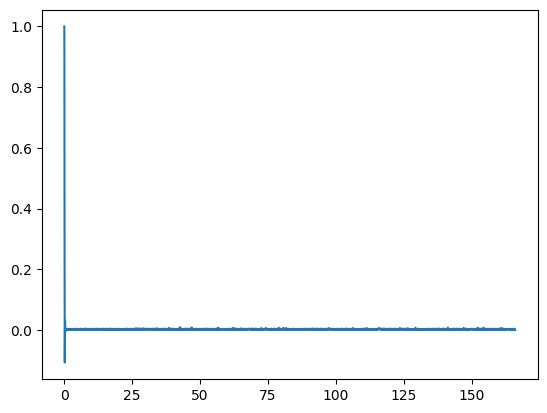

In [21]:
Hg_sp3 = np.asarray(pandas.read_csv('Hg3rd.csv',skipinitialspace=True))
plt.plot(Hg_sp3[:,0],Hg_sp3[:,1])

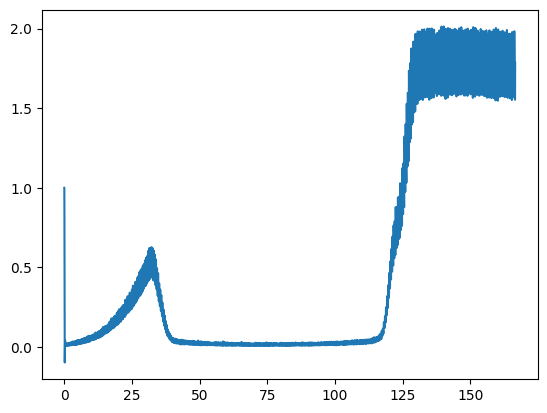

In [22]:
Hg_sp1 = np.asarray(pandas.read_csv('Hg1st.csv',skipinitialspace=True))
plt.plot(Hg_sp1[:,0],Hg_sp1[:,1])

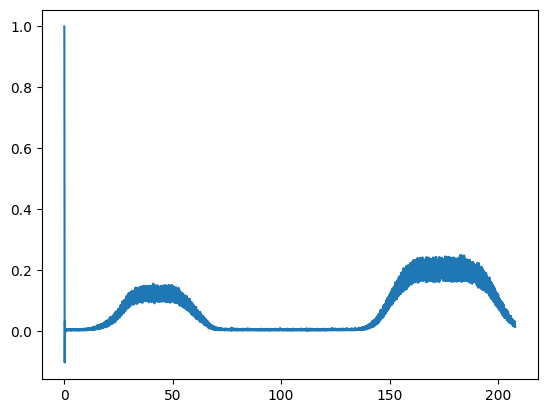

In [23]:
Hg_sp4 = np.asarray(pandas.read_csv('Hg4th.csv',skipinitialspace=True))
plt.plot(Hg_sp4[:,0],Hg_sp4[:,1])

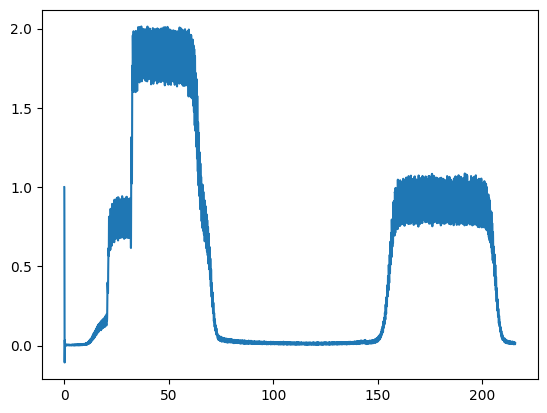

In [24]:
Hg_sp5 = np.asarray(pandas.read_csv('Hg5th.csv',skipinitialspace=True))
plt.plot(Hg_sp5[:,0],Hg_sp5[:,1])

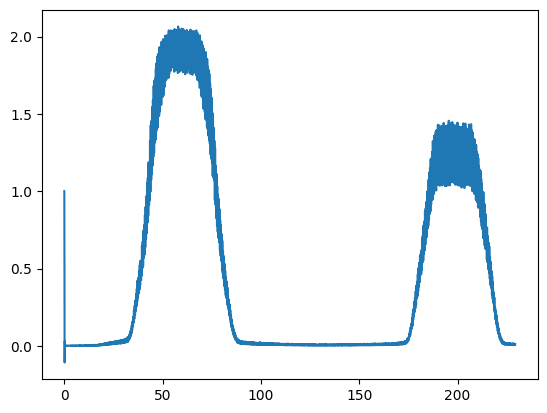

In [25]:
Hg_sp6 = np.asarray(pandas.read_csv('Hg6th.csv',skipinitialspace=True))
plt.plot(Hg_sp6[:,0],Hg_sp6[:,1])

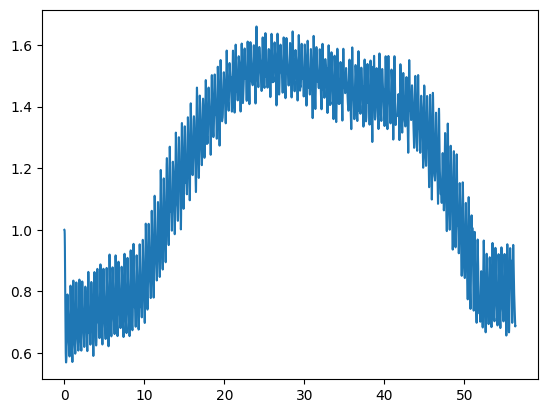

In [115]:
HD1_01 = np.asarray(pandas.read_csv('HD1_01.csv',skipinitialspace=True))
plt.plot(HD1_01[:,0],HD1_01[:,1])

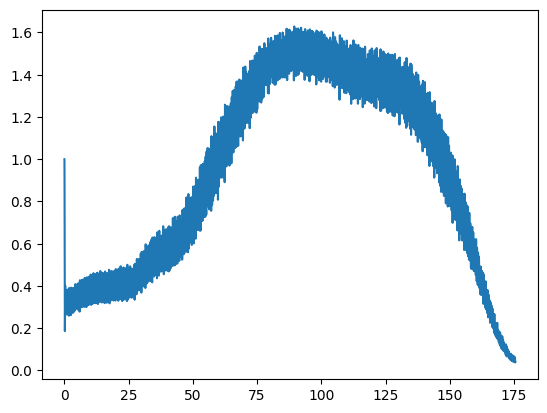

In [5]:
HD1_06 = np.asarray(pandas.read_csv('HD1_06.csv',skipinitialspace=True))
plt.plot(HD1_06[:,0],HD1_06[:,1])

In [132]:
from scipy.optimize import curve_fit
from scipy.stats import truncnorm

def normal(x, x0, sigma, A): 
    return A*truncnorm.pdf(x,loc=x0,scale=sigma,a=(x[0] - x0)/sigma,b=(x[-1] - x0)/sigma)

def divide_data(x,y,t_divide):
    H_x = []
    H_y = []
    D_x = []
    D_y = []
    for i, x_i in enumerate(x):
        if x_i<t_divide:
            D_x.append(x_i)
            D_y.append(y[i])
        else:
            H_x.append(x_i)
            H_y.append(y[i])
            
    return np.asarray(H_x),np.asarray(H_y),np.asarray(D_x),np.asarray(D_y)
            

In [133]:
H_x, H_y, D_x, D_y = divide_data(HD1_01[:,0],HD1_01[:,1],35)
popt_D,pcov_D = curve_fit(normal,D_x,D_y)
popt_H,pcov_H = curve_fit(normal,H_x,H_y)

In [134]:
print(popt_D,popt_H)

[28.84709212 19.69641617 41.76306256] [37.47160291 14.8297508  25.19224356]


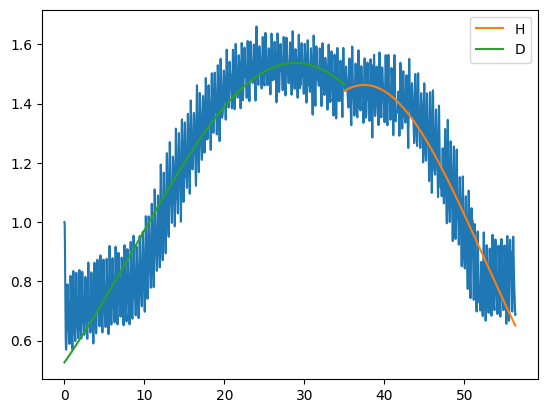

In [135]:
plt.plot(HD1_01[:,0],HD1_01[:,1])
plt.plot(H_x,normal(H_x,*popt_H),label='H')
plt.plot(D_x,normal(D_x,*popt_D),label='D')
#plt.plot(H_x,H_y,label='H')
#plt.plot(D_x,D_y,label='D')
plt.legend()

[117.12657775  56.00254803  85.94496965] [116.63218809  29.94806713  76.96857862]


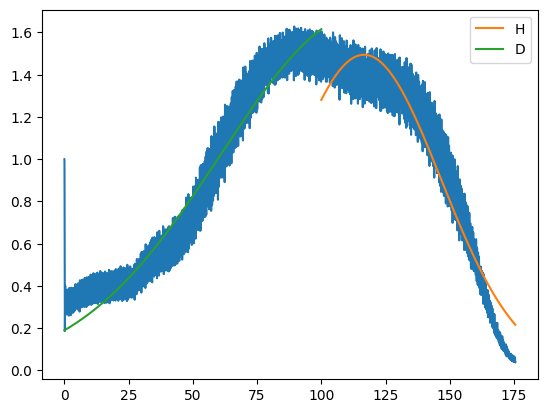

In [136]:
def fitting(HD,t_divide):
    H_x, H_y, D_x, D_y = divide_data(HD[:,0],HD[:,1],t_divide)
    popt_D,pcov_D = curve_fit(normal,D_x,D_y)
    popt_H,pcov_H = curve_fit(normal,H_x,H_y)
    print(popt_D,popt_H)
    plt.plot(HD[:,0],HD[:,1])
    plt.plot(H_x,normal(H_x,*popt_H),label='H')
    plt.plot(D_x,normal(D_x,*popt_D),label='D')
    plt.legend()

fitting(HD1_06,100)

[28.84709212 19.69641617 41.76306256] [37.47160291 14.8297508  25.19224356]


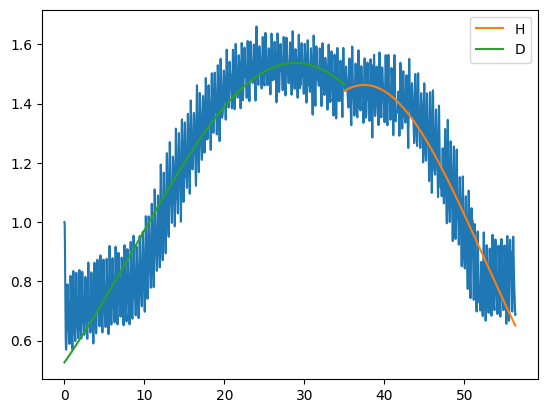

In [137]:
fitting(HD1_01,35)